<a href="https://colab.research.google.com/github/sivakrushna-works/AI-Code-Samples/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs

In [11]:
X,y = make_blobs(n_samples=1000,n_features=2,centers=3)

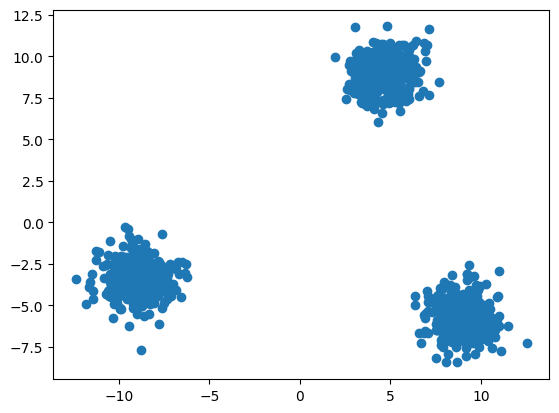

In [12]:
plt.scatter(X[:,0], X[:,1])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [14]:
# standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

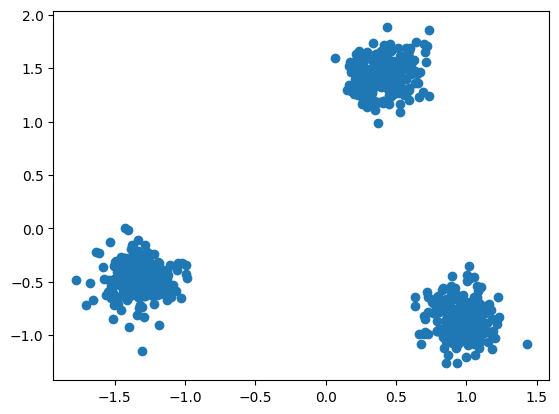

In [15]:
plt.scatter(X_train[:,0], X_train[:,1])

In [16]:
from sklearn.cluster import KMeans

In [18]:
wlss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++" ,)
    kmeans.fit(X_train)
    wlss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

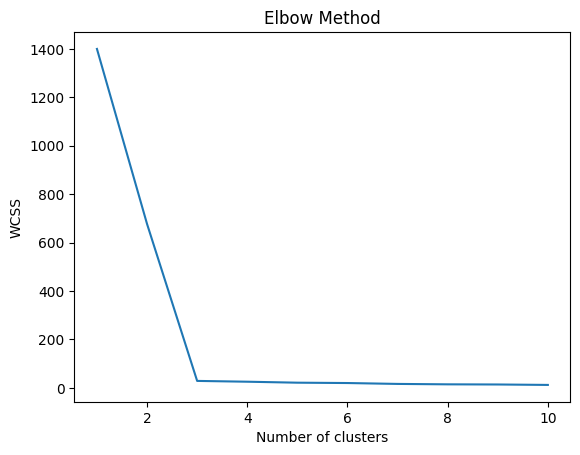

In [19]:
plt.plot(range(1,11),wlss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [20]:
model = KMeans(n_clusters=3, init="k-means++" )
model.fit(X_train)

KMeans(n_clusters=3)

In [23]:
y_pred = model.predict(X_test)

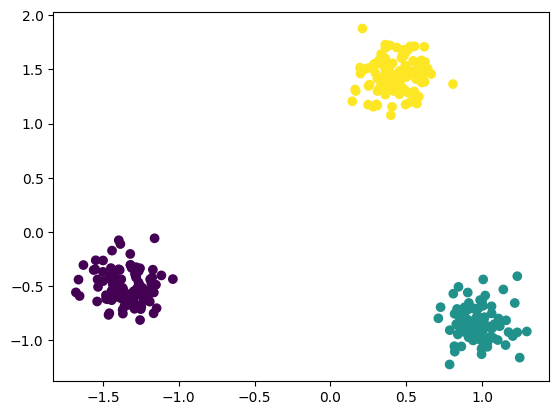

In [25]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

In [27]:
!pip install kneed

In [38]:
# validating k value
#knee locater, silhoutee scoring
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [29]:
kneed = KneeLocator(range(1,11),wlss, curve="convex", direction="decreasing")

In [31]:
kneed.elbow

3

In [39]:
silhoput_coeffcients = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init="k-means++" )
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhoput_coeffcients.append(score)

Text(0, 0.5, 'Silhouette Score')

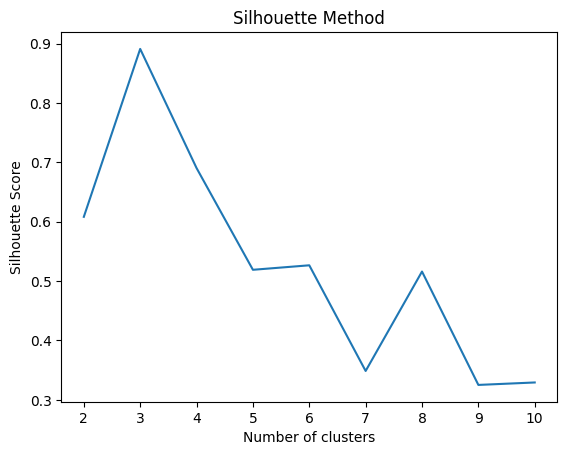

In [40]:
plt.plot(range(2,11),silhoput_coeffcients)
plt.title("Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")